<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/5_2CrossValidation_GreedSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 검증 세트
- 테스트 세트를 사용해 계속 일반화 성능을 확인 => 점점 모델이 테스트 세트에 맞춰짐 => 일반화 성능 올바른 예측 불가능
- 때문에 가능한 테스트 세트를 사용하지 말아야함...모델을 만들고 마지막에 딱 한번만 사용하는 것이 GOOD!
- 그래서 훈련 세트에서 약 2~30%를 검증 세트(validation set)를 떼어놓음
- 이걸로 모델이 과소/과대 적합인지 판단
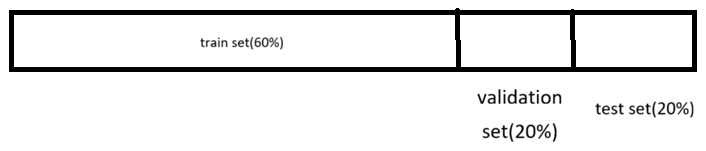

In [16]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data') #판다스 데이터 프레임으로 와인 데이터 셋 가져오기

In [17]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42) #테스트 세트 비율 20%(기본 25%)

In [19]:
#validation set 만들기
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42) #validation set 비율 20%

In [20]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [21]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
#과대 적합 => 더 좋은 매개 변수를 찾으러 떠나야해

0.9971133028626413
0.864423076923077


# 교차 검증
- 검증 세트를 떼어 내어 평가 하는 과정을 여러 번 반복
- 점수들을 평균하여 최종 검증 점수 산출
- k - fold cross validation: 훈련 세트를 k 부분으로 나누어서 cross validation 실행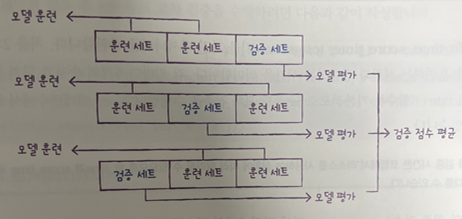

- 저 그림은 3 - fold cross valiation이며 보통 5나 10 fold cross validation을 많이 사용한다
- 그래야 데이터의 80~90%까지 훈련에 사용 가능하기 때문

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target) #모델 객체, 훈련 세트 전체를 cross_validate()에 전달
#기본적으로 5 fold cross validation을 실행하고 cv 매개변수로 k값 지정
#fit_time, score_time, test_score 키를 가진 딕셔너리를 반환
print(scores)

{'fit_time': array([0.01170087, 0.0090034 , 0.01548815, 0.00996208, 0.00860929]), 'score_time': array([0.00214124, 0.00163198, 0.00126529, 0.00140858, 0.00172186]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


1. fit_time: 각 모델을 훈련하는 시간
2. score_time: 각 모델을 검증하는 시간
3. test_score: 각 모델의 점수
4. 최종 점수: test_score의 점수를 평균낸 값




In [23]:
import numpy as np
print(np.mean(scores['test_score'])) #test_score의 점수를 평균내서 최종 점수 확인

0.855300214703487


In [24]:
#cross_validate()
#회귀 모델일 경우 KFold 분할기
#분류 모델일 경우 StratifiedKFold 분할기
#앞서 수행한 교차 검증과 동일한 코드
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [25]:
#훈련 세트를 섞은 후 10 - fold cross validation
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


# 하이퍼 파라미터 튜닝


*   모델 파라미터: 머신 러닝 모델이 학습하는 파라미터
*   하이퍼 파라미터: 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터(ex) 클래스 or 메서드의 매개변수들)
*   최적의 하이퍼 파라미터를 찾아서 지정하는 걸 하이퍼 파라미터 튜닝이라고한다.
1. 기본 값 그대로 사용해 모델을 훈련
2. 검증 세트의 점수나 교차 검증을 통해서 매개변수 조금씩 바꿔가면서 최적의 모델 찾기



**Grid Search를 이용한 하이퍼 파라미터 튜닝**

In [26]:
#GridSearchCV클래스는 하이퍼 파라미터 탐색과 교차 검증을 한번에 수행
#decision tree 모델에서 최적의 min_impurity_decrease 매개변수 찾는 예제
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} #딕셔너리 선언, 0.0001 ~0.0005, 0.0001씩 증가하는 5개의 값
gs = GcisionTreeClaridSearchCV(Dessifier(random_state=42), params, n_jobs = -1) #탐색 대상 모델, params 변수 전달
#GridSearchCV의 cv 매개변수의 기본 값은 5이다. 그래서 min_impurity_decrease 값마다 5-fold cross validation을 실행해서 5*5, 총 25개의 모델을 훈련시킨다,
# n_jobs = -1로 지정해서 모든 cpu 코어를 사용
gs.fit(train_input, train_target)
#25개 모델 훈련이 끝나면 검증 점수가 가장 높은 모델의 매개 변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련함
#그 훈련한 모델은 gs 객체의 best_estimator_ 속성에 저장됨
dt = gs.best_estimator_
print(dt.score(train_input, train_target))


0.9615162593804117


In [27]:
#Grid search로 찾은 최적의 매개 변수는 best_params_ 속성에 저장되어있음
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [28]:
#각 매개 변수 값에서 실행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score' 키에 저장
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [29]:
best_index = np.argmax(gs.cv_results_['mean_test_score']) # np.argmax()로 5개의 교차 검증의 평균 점수 중에 가장 큰 값의 인덱스 추출
print(gs.cv_results_['params'][best_index]) #그 인덱스를 이용해 params 키에 저장된 매개변수 출력
#이 값이 최적의 매개 변수 값이다. gs.best_params_와 동일함

{'min_impurity_decrease': 0.0001}


**과정**
1. 탐색 할 매개 변수를 지정
2. 훈련 세트에서 그리드 서치를 수행하여 최선의 평균 검증 점수가 나오는 매개 변수 조합 찾은 후 이 조합을 그리드 서치 객체(gs.best_params)에 저장
3. 그리드 서치는 최상의 매개변수와 전체 훈련 세트로 최종 모델 훈련. 이 모델도 그리드 서치 객체(gs.best_estimator_)에 저장



In [35]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), #0.0001, 0.0002, ~0.0009
          'max_depth': range(5, 20, 1), #5 ~ 19
          'min_samples_split': range(2, 100, 10)} #2, 12, 22, ~92
          #9 x 15 x 10 = 1350, 교차 검증 할 매개 변수 조합의 수 1350가지
          # 1350 x 5 = 6750, 훈련되는 모델의 수 6750개



In [36]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [37]:
print(np.max(gs.cv_results_['mean_test_score'])) #최상의 교차 검증 점수

0.8683865773302731


**랜덤 서치**
- 매개 변수의 값이 수치 일 때 값의 범위나 간격을 미리 정하기 어려울 때, 또 너무 많은 매개변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴때 사용
- 매개 변수 값의 목록을 전달 X, ***매개 변수를 샘플링 할 수 있는 확률 분포 객체를 전달***

In [38]:
from scipy.stats import uniform, randint

In [39]:
#randint, uniform 클래스는 주어진 범위에서 고르게 값을 뽑는다. 이를 "균등 분포에서 샘플링한다"라고 말한다.
# randint는 정숫값을, unique는 실숫갑을 뽑는게 차이
rgen = randint(0, 10) #0~10 사이의 범위를 갖는 randint 객체 생성
rgen.rvs(10) #숫자 10개 샘플링

array([6, 9, 9, 6, 8, 6, 3, 6, 6, 4])

In [41]:
np.unique(rgen.rvs(1000), return_counts=True) #숫자 1000개 샘플링 후 각 숫자의 개수 출력
#샘플링 수를 늘리니 어느정도 고르게 샘플링 된걸 확인할 수 있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 86, 115,  88, 108,  90, 124, 115,  97,  89,  88]))

In [42]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.61908481, 0.46285566, 0.88419264, 0.73881139, 0.28077126,
       0.83844854, 0.56864415, 0.53160351, 0.05594248, 0.10359486])

In [43]:
#min_samples_leaf 매개 변수도 탐색 대상에 추가 후 랜덤 서치 실행
#min_samples_leaf의 값 보다 노드의 샘플 수가 작을 경우 분할 하지 않는다.
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25)}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params, n_iter = 100, n_jobs = -1, random_state = 42)
#RandomizedSearchCV 객체 생성, n_iter = 100 => 샘플링 횟수 100으로 지정
#앞선 GridSearchCV보다 교차 검증 수를 줄이면서 효과적으로 탐색 가능
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f60e1023da0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f60e0f25970>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f60e10916d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f60e1023530>},
                   random_state=42)

In [45]:
print(gs.best_params_) #최적의 매개 변수 조합 확인

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [46]:
print(np.max(gs.cv_results_['mean_test_score'])) #최고 교차 검증 점수 확인

0.8695428296438884


In [49]:
dt = gs.best_estimator_ #best_estimator_에 저장된 최적의 모델
print(dt.score(test_input, test_target)) #드디어 테스트 세트로 확인

0.86


In [52]:
#DecisionTreeClassifier 클래스에 splitter = 'random' 매개 변수를 추가하고 훈련하는 예제
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter = 'random', random_state = 42), params, n_iter = 100, n_jobs = -1, random_state = 42)
#RandomizedSearchCV 객체 생성, n_iter = 100 => 샘플링 횟수 100으로 지정
#앞선 GridSearchCV보다 교차 검증 수를 줄이면서 효과적으로 탐색 가능
gs.fit(train_input, train_target)
print(gs.best_params_) #최적의 매개 변수 조합 확인
print(np.max(gs.cv_results_['mean_test_score'])) #최고 교차 검증 점수 확인
dt = gs.best_estimator_ #best_estimator_에 저장된 최적의 모델
print(dt.score(test_input, test_target)) #드디어 테스트 세트로 확인

{'max_depth': 43, 'min_impurity_decrease': np.float64(0.00011407982271508446), 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077


splitter의 기본 값은 'best'로, 각 노드에서 최선의 분할을 찾는다.
이에 반해 'random'이면 무작위로 분할 한 다음 가장 좋은 것을 고른다.
근데 'random'으로 지정하니까 테스트 세트에서의 정확도가 많이 내려갔다. 왜그럴까?

 재미나이 왈: 모든 가능한 분할을 탐색하지 않고 무작위로 일부 특성과 임계값을 선택하기 때문에, 최적의 분할을 놓칠 수 있어 모델의 일반화 성능이 저하될 가능성이 있기 때문입니다.

그럼 random splitter가 유용하게 쓰일 때는 언제일까?

재미나이 왈: 스플리터가 개별 Decision Tree의 정확도를 약간 낮출 수는 있지만, 과적합을 줄이고 계산 효율성을 높이며, 앙상블 모델의 성능을 향상시키는 데 중요한 역할을 할 수 있습니다.

이걸 이제 다음장에서 배운다는거구나